# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [66]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn


In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

In [3]:
student_data.sample()

,Age,Tardies
7,26,6


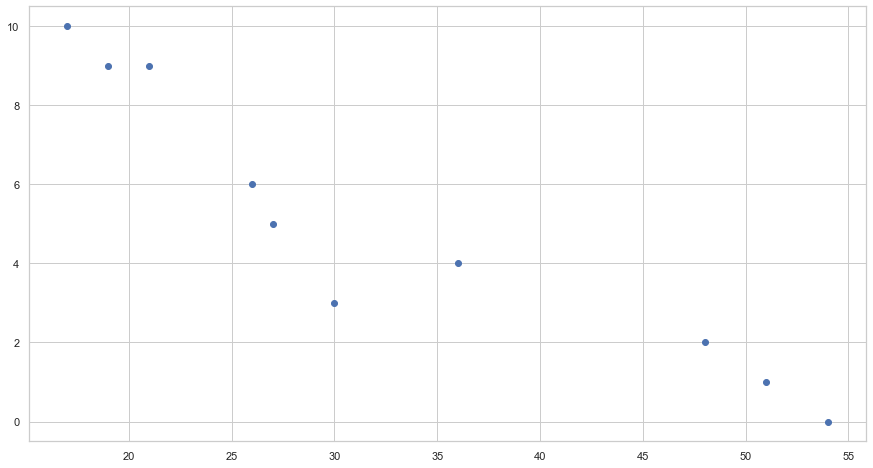

In [4]:
plt.scatter(x= student_data.Age, y= student_data.Tardies );

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
""" From the data obtained we can infer saying that the youngest is the student the more times arrives in late"""

' From the data obtained we can infer saying that the youngest is the student the more times arrives in late'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
covariance= student_data.cov()
correlation= student_data.corr()
print(f'convariance :\n {covariance}')
print(f'correlation :\n {correlation}')

convariance :
                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
correlation :
               Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


In [7]:
"""
"""

'\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
lr = LinearRegression()
lr.fit(
    X = student_data[["Age"]],
    y = student_data.Tardies 
)

LinearRegression()

In [9]:
"""Tardies will be the variable, using linear regression """

'Tardies will be the variable, using linear regression '

In [10]:
intercept=lr.intercept_

In [11]:
coef=lr.coef_

In [12]:
student_data["Prediction"]= (coef[0]*student_data["Age"]) + intercept

Plot your regression model on your scatter plot.

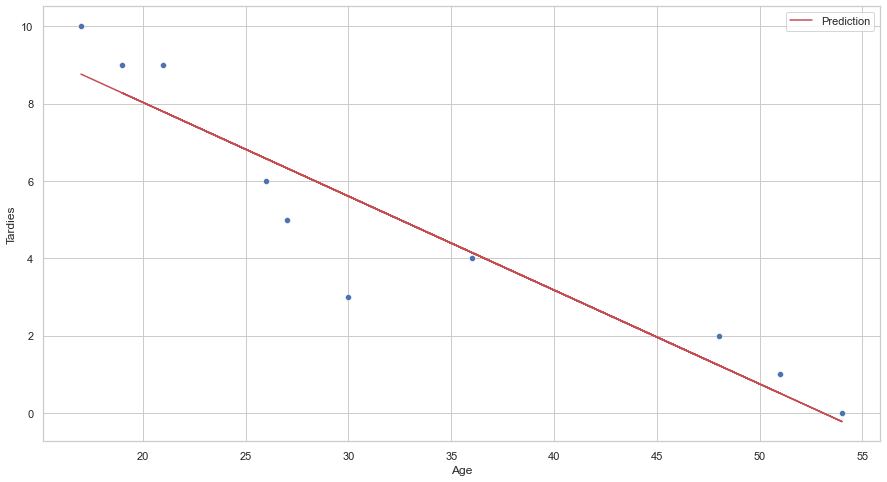

In [45]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data.Prediction, label="Prediction", color="r")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
"""Getting a linear regression by a decrasing trend. As we can see on it the many plots are far from the linear regression, 
specially in the middle age, where this discrepancy becomes more accute;for this reason we don't fully relly on this prediction
model as we can't adjust it to reality so far. """

"Getting a linear regression by a decrasing trend. As we can see on it the many plots are far from the linear regression, \nspecially in the middle age, where this discrepancy becomes more accute;for this reason we don't fully relly on this prediction\nmodel as we can't adjust it to reality so far. "

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [27]:
df_car=pd.read_csv('vehicles.csv')
df_car.drop(columns=['Make','Model','Fuel Type','Engine Displacement','Transmission', 'Drivetrain','Vehicle Class','City MPG','Highway MPG'],inplace=True)
df_car.sample()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
2941,2010,8.0,21.974,15,592.466667,2700


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [31]:
correlation= df_car.corr()
correlation
""" It's the Fuel Barrels/Year which means that, for more fuel the vehicle consums per year, more emissions gonna happen"""

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [32]:
lr = LinearRegression()
lr.fit(
    X = df_car[["Fuel Barrels/Year"]],
    y = df_car['CO2 Emission Grams/Mile']
)

LinearRegression()

In [38]:
intercept_1=lr.intercept_
coef_1=lr.coef_

In [40]:
df_car["Prediction"]= (coef_1[0]*df_car["Fuel Barrels/Year"]) + intercept_1

In [43]:
df_car.sample()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Prediction
18050,2010,4.0,14.982273,22,403.954545,1500,406.274965


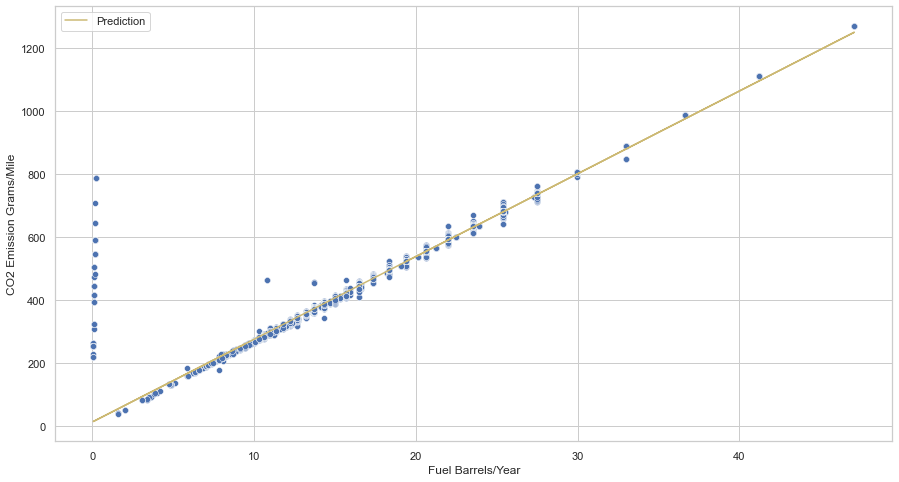

In [46]:
sns.scatterplot(x=df_car["Fuel Barrels/Year"], y=df_car['CO2 Emission Grams/Mile'])
plt.plot(df_car["Fuel Barrels/Year"], df_car["Prediction"], label="Prediction", color="y")
plt.legend();

In [50]:
"""In this case we can summarise with a linear regression because most of the data follows the trend, eventhough there
are some plots which are not accurate"""

'In this case we can summarise with a linear regression because most of the data follows the trend, eventhough there\nare some plots which are not accurate'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [81]:
df_car['CO2_emission']= df_car['CO2 Emission Grams/Mile']
df_car['fuel_barrels_year']=df_car['Fuel Barrels/Year']
df_car['combined_mpg']=df_car['Combined MPG']
df_car['fuel_cost_year']=df_car['Fuel Cost/Year']

In [84]:
df_car.drop(columns= ['CO2 Emission Grams/Mile','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year'], inplace=True)

In [87]:
smf.ols("CO2_emission ~ fuel_barrels_year + combined_mpg + fuel_cost_year ", data=df_car).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_emission   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 5.932e+05
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:17:18   Log-Likelihood:            -1.5235e+05
No. Observations:               35952   AIC:                         3.047e+05
Df Residuals:                   35948   BIC:                         3.047e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           131.6742      1.691     77.861      0.000     128.359     134.989
fuel_barrels_year    19.6955      0.059    331.484      0.000      19.579      19.812
combined_mpg         -3.1661      0.043    -73.626      0.000      -3.250      -3.082
fuel_cost_year        0.0317      0.000     70.466      0.000       0.031       0.033
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.132
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
""" - R squared and R squared adjusted are the same : no noise noted in the data
    - p-values are 0: Hypotheses tested: exists correlation in between the variables chosen
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 